In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ua_data = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 150]
ua_data = np.array(ua_data)
ua_data

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       150])

In [3]:
lab_frame = pd.DataFrame(data=ua_data, columns=['Ua'])
G_CONST = 2.33 * (10 ** (-6)) * (0.00014 / (0.0022 ** 2))
lab_frame['Ia1'] = G_CONST * (0 + 0.4 * lab_frame['Ua']) ** (3/2)
lab_frame['Ia1_mil'] = lab_frame['Ia1'] * 1000
lab_frame['Ia2'] = G_CONST * (-2.5 + 0.4 * lab_frame['Ua']) ** (3/2)
lab_frame['Ia2_mil'] = lab_frame['Ia2'] * 1000
lab_frame['Ia3'] =  G_CONST * (-9.1 + 0.4 * lab_frame['Ua']) ** (3/2)
lab_frame['Ia3_mil'] = lab_frame['Ia3'] * 1000
lab_frame

,Ua,Ia1,Ia1_mil,Ia2,Ia2_mil,Ia3,Ia3_mil
0,0,0.000000,0.000000,NaN,NaN,NaN,NaN
1,10,0.000539,0.539174,0.000124,0.123816,NaN,NaN
2,20,0.001525,1.525013,0.000869,0.869326,NaN,NaN
3,30,0.002802,2.801628,0.001973,1.973440,0.000333,0.332840
4,40,0.004313,4.313388,0.003343,3.343022,0.001222,1.221553
5,50,0.006028,6.028144,0.004934,4.933960,0.002425,2.425372
6,60,0.007924,7.924201,0.006719,6.718871,0.003876,3.876306
7,70,0.009986,9.985634,0.008679,8.678584,0.005538,5.537724
8,80,0.012200,12.200105,0.010799,10.798704,0.007386,7.385703
9,90,0.014558,14.557686,0.013068,13.067900,0.009403,9.403013


In [9]:
lab_frame.to_excel('triod_an.xlsx')

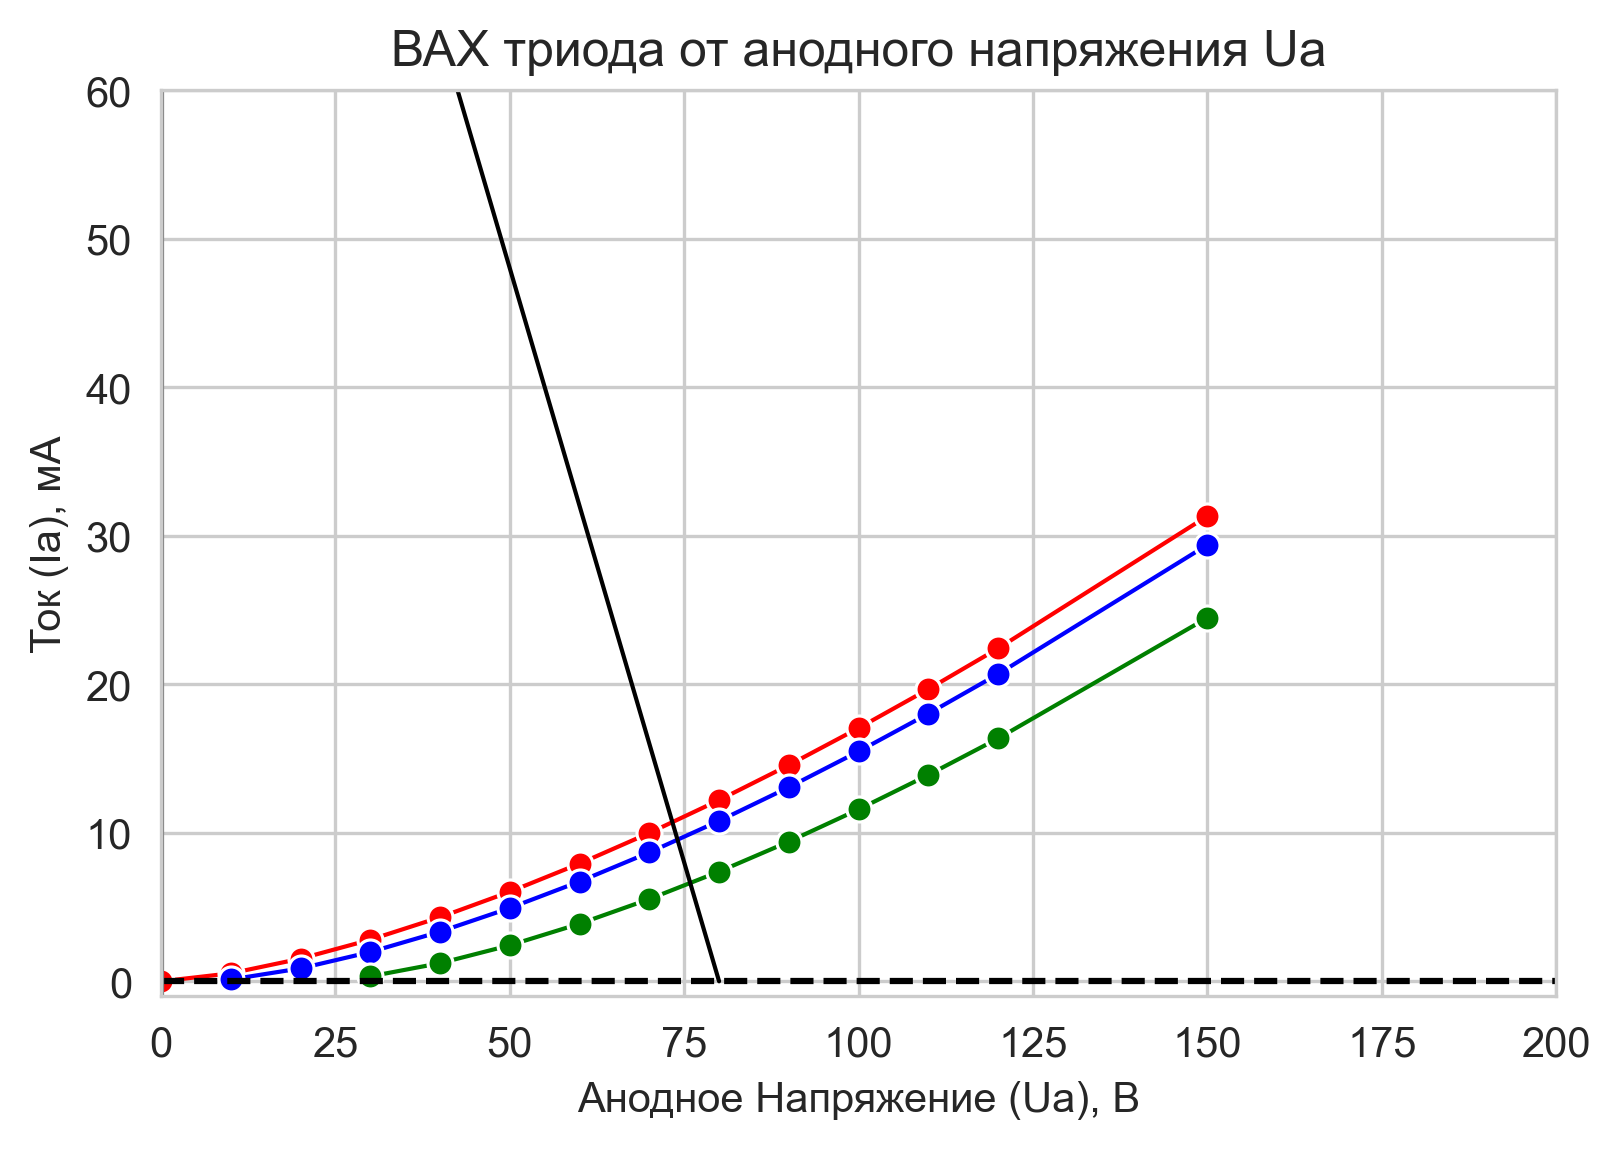

In [20]:
plt.figure(dpi=300)
sns.set_style(style='whitegrid')
plot = sns.lineplot(data=lab_frame, x='Ua', y='Ia1_mil', color='red', linewidth=1, marker='o', dashes=True)
plot_2 = sns.lineplot(data=lab_frame, x='Ua', y='Ia2_mil', color='blue', lw=1, marker='o', dashes=True)
plot_3 = sns.lineplot(data=lab_frame, x='Ua', y='Ia3_mil', color='green', lw=1, marker='o', dashes=True)
plot.set(xlabel='Анодное Напряжение (Ua), В', ylabel='Ток (Ia), мА')
plot.set_title('ВАХ триода от анодного напряжения Ua')

yticks = [10 ** i for i in range(2, 6)]
plot.set_ylim([-1, 60])
plot.set_xlim([0, 200])
plt.axhline(y=0, color="black", linestyle="--")
plt.axvline(color="grey")


plt.plot([80,0], [0,128], lw=1, color='black')
fig = plot.get_figure()

In [10]:
uc_data = [0, -1, -2, -4, -6, -8, -10, -13, -15]
uc_data = np.array(uc_data)
uc_data

array([  0,  -1,  -2,  -4,  -6,  -8, -10, -13, -15])

In [11]:
lab_frame_2 = pd.DataFrame(uc_data, columns=['Uc'])
lab_frame_2

,Uc
0,0
1,-1
2,-2
3,-4
4,-6
5,-8
6,-10
7,-13
8,-15


In [12]:
lab_frame_2['Ia1'] = G_CONST * (lab_frame_2['Uc'] + 0.4 * 50) ** (3/2)
lab_frame_2['Ia1_mil'] = lab_frame_2['Ia1'] * 1000
lab_frame_2['Ia2'] = G_CONST * (lab_frame_2['Uc'] + 0.4 * 55) ** (3/2)
lab_frame_2['Ia2_mil'] = lab_frame_2['Ia2'] * 1000
lab_frame_2

,Uc,Ia1,Ia1_mil,Ia2,Ia2_mil
0,0,0.006028,6.028144,0.006955,6.954607
1,-1,0.005582,5.581732,0.006486,6.485860
2,-2,0.005147,5.146919,0.006028,6.028144
3,-4,0.004313,4.313388,0.005147,5.146919
4,-6,0.003530,3.530455,0.004313,4.313388
5,-8,0.002802,2.801628,0.003530,3.530455
6,-10,0.002131,2.131271,0.002802,2.801628
7,-13,0.001248,1.248204,0.001820,1.819711
8,-15,0.000754,0.753518,0.001248,1.248204


In [21]:
fig.savefig('plot_rab.png')
